# Installé C++ desktop
https://visualstudio.microsoft.com/fr/visual-cpp-build-tools/

In [1]:
pip install ezdxf shapely matplotlib meshpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Propriété du mat

In [7]:
from sectionproperties.pre import Material
from sectionproperties.pre.library import rectangular_section, channel_section
from sectionproperties.analysis import Section

# create materials
steel = Material(
    name="Steel",
    elastic_modulus=210e3,
    poissons_ratio=0.3,
    density=7.85e-6,
    yield_strength=500,
    color="grey",
)

 # Maillage du mat 

modifier chemin du dxf enregistré en format dxf autocad2000/LT2000.dxf

Chemin vers le fichier DXF
dxf_path = r"C:\Users\jeanb\Desktop\Dessin1.dxf"



Validité initiale : False
Problèmes : Ring Self-intersection[122.409017153972 10]
Correction automatique avec buffer(0)...
Polygone corrigé avec succès.
Maillage généré avec succès.


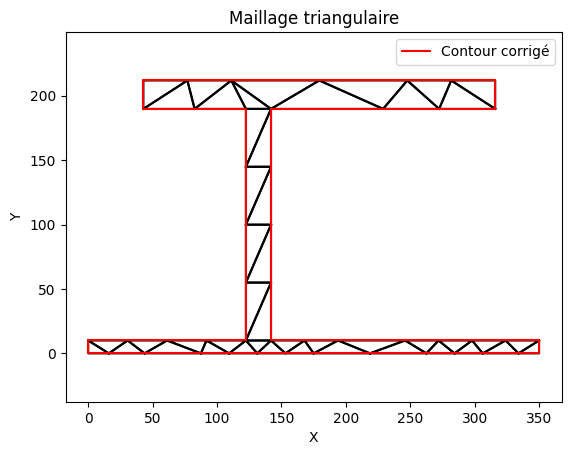

In [1]:
import ezdxf
from shapely.geometry import Polygon
from shapely.validation import explain_validity
import matplotlib.pyplot as plt
from meshpy.triangle import MeshInfo, build

# Chemin vers le fichier DXF
dxf_path = r"C:\Users\jeanb\Desktop\Dessin1.dxf"
# Chemin vers le fichier DXF

def load_dxf_polylines(dxf_path):
    """
    Charge les polylignes d'un fichier DXF et retourne leurs coordonnées.
    """
    doc = ezdxf.readfile(dxf_path)
    msp = doc.modelspace()
    
    for entity in msp:
        if entity.dxftype() == 'LWPOLYLINE':
            # Extraire les points
            points = [(point[0], point[1]) for point in entity]
            if not entity.is_closed:
                points.append(points[0])  # Fermer la polyligne
            return points
    raise ValueError("Aucune polyligne légère (LWPOLYLINE) trouvée.")

def validate_and_correct_polygon(points):
    """
    Valide et corrige un polygone. Retourne un polygone corrigé.
    """
    polygon = Polygon(points)
    if not polygon.is_valid:
        print(f"Validité initiale : {polygon.is_valid}")
        print(f"Problèmes : {explain_validity(polygon)}")
        print("Correction automatique avec buffer(0)...")
        polygon = polygon.buffer(0)  # Corrige les auto-intersections
        if not polygon.is_valid:
            raise ValueError("Impossible de corriger le polygone.")
    return polygon

def generate_mesh(polygon):
    """
    Génère un maillage triangulaire à partir d'un polygone Shapely.
    """
    # Extraire les sommets et les segments
    points = list(polygon.exterior.coords[:-1])  # Supprimer le dernier point (dupliqué)
    segments = [(i, i + 1) for i in range(len(points) - 1)]
    segments.append((len(points) - 1, 0))  # Fermer le contour
    
    # Préparer les données pour MeshPy
    mesh_info = MeshInfo()
    mesh_info.set_points(points)
    mesh_info.set_facets(segments)
    
    # Générer le maillage
    mesh = build(mesh_info)
    return mesh

def plot_mesh(mesh, polygon):
    """
    Affiche le maillage triangulaire généré avec matplotlib.
    """
    fig, ax = plt.subplots()
    
    # Tracer les triangles
    for triangle in mesh.elements:
        x_coords = [mesh.points[i][0] for i in triangle] + [mesh.points[triangle[0]][0]]
        y_coords = [mesh.points[i][1] for i in triangle] + [mesh.points[triangle[0]][1]]
        ax.plot(x_coords, y_coords, 'k-')

    # Tracer le contour d'origine
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'r-', label="Contour corrigé")

    ax.set_title("Maillage triangulaire")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.axis("equal")
    plt.legend()
    plt.show()

def main():
    """
    Fonction principale pour charger un DXF, corriger une polyligne et générer un maillage.
    """
    try:
        # Charger les polylignes du fichier DXF
        points = load_dxf_polylines(dxf_path)
        
        # Valider et corriger la géométrie
        polygon = validate_and_correct_polygon(points)
        print("Polygone corrigé avec succès.")
        
        # Générer le maillage
        mesh = generate_mesh(polygon)
        print("Maillage généré avec succès.")
        
        # Afficher le maillage
        plot_mesh(mesh, polygon)

    except Exception as e:
        print(f"Erreur : {e}")

if __name__ == "__main__":
    main()


Chargement de la géométrie depuis le fichier DXF...
Validité initiale : False
Problèmes détectés : Ring Self-intersection[122.409017153972 10]
Correction automatique avec buffer(0)...
Polygone corrigé avec succès.
Génération de la géométrie...
Création du maillage...
Maillage créé avec succès.
Affichage de la géométrie...


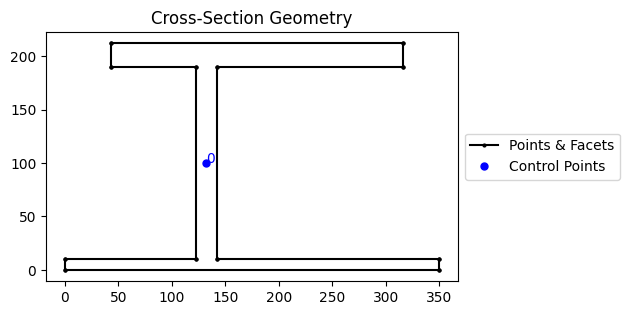

Analyse de la section...

=== Résultats calculés ===


     Section Properties      
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property  ┃         Value ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ area      │  1.302930e+04 │
│ perimeter │  1.630792e+03 │
│ qx        │  1.577115e+06 │
│ qy        │  2.156326e+06 │
│ ixx_g     │  2.876277e+08 │
│ iyy_g     │  4.355098e+08 │
│ ixy_g     │  2.662946e+08 │
│ cx        │  1.654983e+02 │
│ cy        │  1.210438e+02 │
│ ixx_c     │  9.672776e+07 │
│ iyy_c     │  7.864150e+07 │
│ ixy_c     │  5.284728e+06 │
│ zxx+      │  1.065492e+06 │
│ zxx-      │  7.991140e+05 │
│ zyy+      │  4.262373e+05 │
│ zyy-      │  4.751801e+05 │
│ rx        │  8.616187e+01 │
│ ry        │  7.769005e+01 │
│ i11_c     │  9.815872e+07 │
│ i22_c     │  7.721054e+07 │
│ phi       │ -1.515082e+01 │
│ z11+      │  7.732572e+05 │
│ z11-      │  6.131426e+05 │
│ z22+      │  3.681518e+05 │
│ z22-      │  5.432981e+05 │
│ r11       │  8.679685e+01 │
│ r22       │  7.697999e+01 │
│ j         │  1.550962e+06 │
│ x_se      │  9.200615e+01 │
│ y_se      │  1.054476e+02 │
│ x1_se     │ -6.686142e+01 │
│ y2_se     │ -3.426201e+01 │
│ x_st      │  9.200615e+01 │
│ y_st      │  1.054476e+02 │
│ gamma     │  7.154042e+11 │
│ a_sx      │  7.271728e+03 │
│ a_sy      │  2.948209e+03 │
│ a_s11     │  6.209478e+03 │
│ a_s22     │  3.167928e+03 │
│ beta_x+   │  1.210817e+01 │
│ beta_x-   │ -1.210817e+01 │
│ beta_y+   │ -1.860498e+02 │
│ beta_y-   │  1.860498e+02 │
│ beta_11+  │ -3.551800e+01 │
│ beta_11-  │  3.551800e+01 │
│ beta_22+  │ -1.863071e+02 │
│ beta_22-  │  1.863071e+02 │
│ x_pc      │  1.391010e+02 │
│ y_pc      │  1.645545e+02 │
│ x11_pc    │  1.585385e+02 │
│ y22_pc    │  1.574124e+02 │
│ sxx       │  1.015895e+06 │
│ syy       │  7.918549e+05 │
│ s11       │  1.015776e+06 │
│ s22       │  7.779876e+05 │
│ sf_xx+    │  9.534507e-01 │
│ sf_xx-    │  1.271276e+00 │
│ sf_yy+    │  1.857779e+00 │
│ sf_yy-    │  1.666431e+00 │
│ sf_11+    │  1.313633e+00 │
│ sf_11-    │  1.656672e+00 │
│ sf_22+    │  2.113225e+00 │
│ sf_22-    │  1.431972e+00 │
└───────────┴───────────────┘


Affichage des centroids...


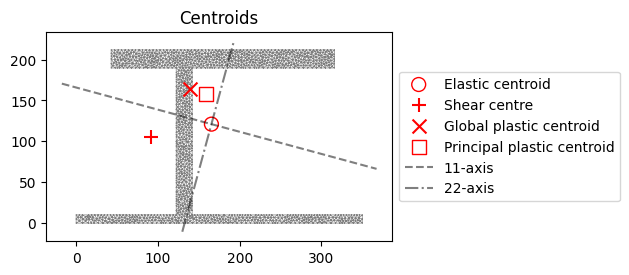

Analyse des contraintes...


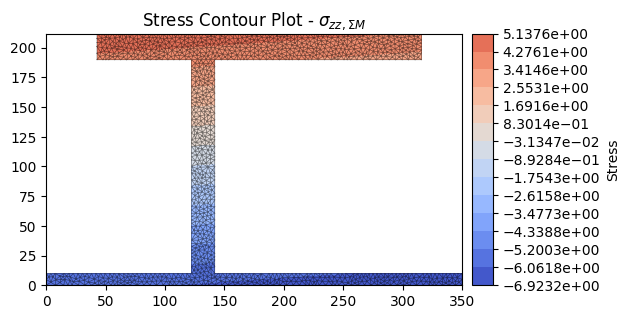

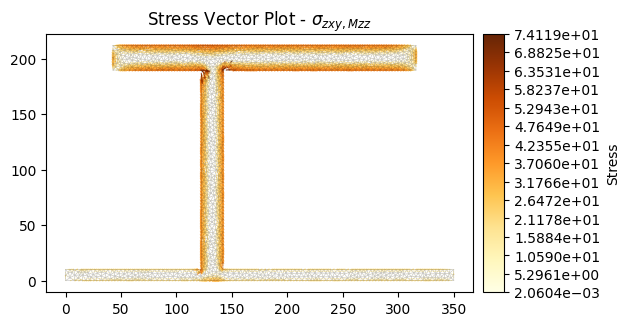

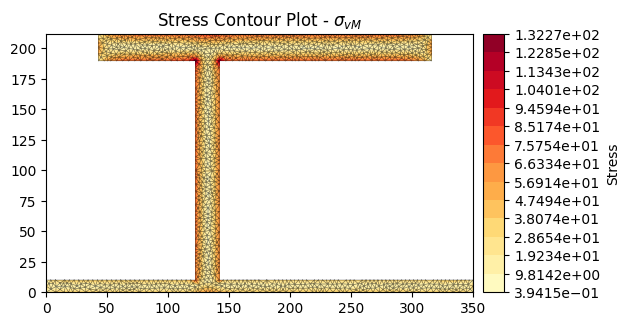

Analyse terminée avec succès.


In [23]:
import ezdxf
from shapely.geometry import Polygon
from shapely.validation import explain_validity
from sectionproperties.pre.geometry import Geometry
from sectionproperties.analysis.section import Section
import matplotlib.pyplot as plt

# Chemin vers le fichier DXF
dxf_path = r"C:\Users\jeanb\Desktop\Dessin1.dxf"

def charger_polyligne_dxf(chemin_dxf):
    """Charge les polylignes d'un fichier DXF et retourne leurs coordonnées."""
    doc = ezdxf.readfile(chemin_dxf)
    msp = doc.modelspace()
    for entite in msp:
        if entite.dxftype() == 'LWPOLYLINE':
            points = [(point[0], point[1]) for point in entite]
            if not entite.is_closed:
                points.append(points[0])  # Fermer la polyligne
            return points
    raise ValueError("Aucune polyligne légère (LWPOLYLINE) trouvée dans le fichier.")

def valider_et_corriger_polygone(points):
    """Valide et corrige un polygone. Retourne un polygone corrigé."""
    polygone = Polygon(points)
    if not polygone.is_valid:
        print(f"Validité initiale : {polygone.is_valid}")
        print(f"Problèmes détectés : {explain_validity(polygone)}")
        print("Correction automatique avec buffer(0)...")
        polygone = polygone.buffer(0)  # Corrige les auto-intersections
        if not polygone.is_valid:
            raise ValueError("Impossible de corriger le polygone.")
    return polygone

def generer_geometrie(polygone):
    """Convertit un polygone corrigé en une géométrie utilisable par sectionproperties."""
    points = list(polygone.exterior.coords[:-1])  # Supprimer le dernier point (dupliqué)
    facettes = [(i, i + 1) for i in range(len(points) - 1)]
    facettes.append((len(points) - 1, 0))  # Fermer le contour
    point_de_controle = [polygone.representative_point().coords[0]]
    return Geometry.from_points(points=points, facets=facettes, control_points=point_de_controle)

def afficher_resultats(section):
    """Affiche les résultats calculés et visualise les contraintes."""
    print("\n=== Résultats calculés ===")
    section.display_results()

    # Affichage des centroids
    print("Affichage des centroids...")
    section.plot_centroids()
    plt.show()

    # Analyse de contraintes avec un cas de charge
    print("Analyse des contraintes...")
    stress_case = section.calculate_stress(mxx=5e6, vy=-10e3, mzz=3e6)  # Exemple de cas de charge

    # Afficher les contraintes
    stress_case.plot_stress(stress="m_zz")  # Contrainte de flexion
    plt.show()

    stress_case.plot_stress_vector(stress="mzz_zxy")  # Vecteurs de contrainte de torsion
    plt.show()

    stress_case.plot_stress(stress="vm", cmap="YlOrRd", normalize=False)  # Contrainte de Von Mises
    plt.show()

def analyser_section_dxf():
    """Analyse une géométrie issue d'un fichier DXF."""
    try:
        # Charger les données DXF
        print("Chargement de la géométrie depuis le fichier DXF...")
        points = charger_polyligne_dxf(dxf_path)

        # Valider et corriger les géométries
        polygone = valider_et_corriger_polygone(points)
        print("Polygone corrigé avec succès.")

        # Générer la géométrie
        print("Génération de la géométrie...")
        geometrie = generer_geometrie(polygone)

        # Création du maillage
        print("Création du maillage...")
        geometrie.create_mesh(mesh_sizes=[10.0])
        print("Maillage créé avec succès.")

        # Visualisation de la géométrie et du maillage
        print("Affichage de la géométrie...")
        geometrie.plot_geometry()
        plt.show()

        # Analyse de la section
        print("Analyse de la section...")
        section = Section(geometry=geometrie)
        section.calculate_geometric_properties()
        section.calculate_plastic_properties()
        section.calculate_warping_properties()

        # Afficher les résultats et effectuer l'analyse de contraintes
        afficher_resultats(section)

        print("Analyse terminée avec succès.")

    except Exception as e:
        print(f"Erreur lors de l'analyse DXF : {e}")

if __name__ == "__main__":
    analyser_section_dxf()
